In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bempp.api
from bempp.api import shapes
import bempp_cavity

# Define Mesh

In [3]:
ELEMENT_SIZE = 0.5
LENGTH_CAVITY = 1
LENGTH_WALL = 2

In [4]:
inner_wall = shapes.cube(
    length=LENGTH_CAVITY, h=ELEMENT_SIZE,
    origin=(-LENGTH_CAVITY/2, -LENGTH_CAVITY/2, -LENGTH_CAVITY/2)
)
outer_wall = shapes.cube(
        length=LENGTH_WALL, h=ELEMENT_SIZE,
        origin=(-LENGTH_WALL/2, -LENGTH_WALL/2, -LENGTH_WALL/2)
)
grid = bempp_cavity.create_grid(outer_wall, inner_wall)

# Define Parameters and incident wave

In [5]:
Ks = [1, 2, 1]
MUs = [1, 1, 1]
wave = bempp_cavity.IncidentWave(Ks[0], MUs[0])

1 1


# Create Models

In [6]:
model_sf = bempp_cavity.Model(grid, Ks, MUs, wave)

In [15]:
model_wf = bempp_cavity.Model(grid, Ks, MUs, wave, spaces='RWG-dominant')

# Solve Them

In [19]:
methods = [
    'none', 
    'diagonal',
    'self',
]
sol_sf = {
    method: model_sf.solve(preconditioner=method)
    for method in methods
}
sol_wf = {
    method: model_wf.solve(preconditioner=method)
    for method in methods
}

# Analyse Results

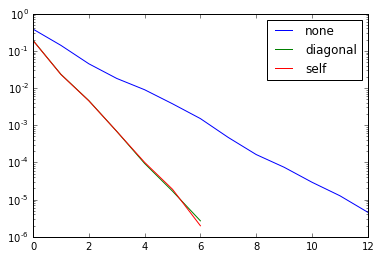

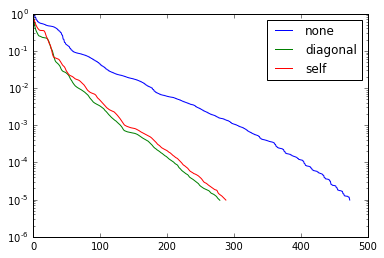

In [21]:
for method in methods:
    plt.semilogy(sol_sf[method].residuals, label=method)
plt.legend()
plt.show();

for method in methods:
    plt.semilogy(sol_wf[method].residuals, label=method)
plt.legend()
plt.show();

In [46]:
sol_1.info

{'matvec_count': 312,
 'status': 0,
 'time_assemble': 187.15175699999998,
 'time_solve': 16.01207599999998}

In [47]:
sol_1.system.get_total_memory_size()

666538

In [48]:
solb_1.info

{'matvec_count': 11376,
 'status': 0,
 'time_assemble': 9.819170999999983,
 'time_solve': 106.111512}

In [50]:
solb_1.system.get_total_memory_size()

26218

In [44]:
sol_2.info

{'matvec_count': 280,
 'status': 0,
 'time_assemble': 0.06139500000017506,
 'time_solve': 12.784157999999934}

In [48]:
sol_3.info

{'matvec_count': 336,
 'status': 0,
 'time_assemble': 0.054474000000027445,
 'time_solve': 12.824708999999984}

In [9]:
model.system.get_memory_size()

666538

In [29]:
x = sol_2.system.operator.weak_form()
x[0, 0].memory


17417.109375

1 2 1 1
[2916, 9184, 36300]
cavity
wall
exterior


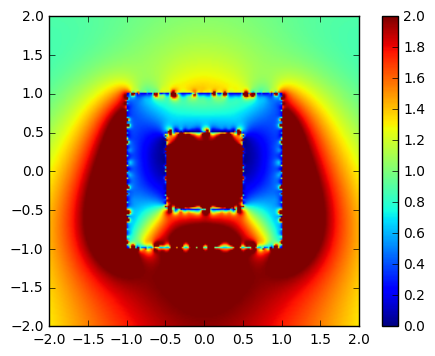

In [16]:
sol_2.plot()

1 2 1 1
[2916, 9184, 36300]
cavity
wall
exterior


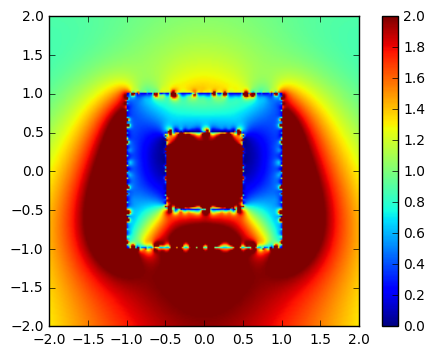

In [17]:
sol_1.plot()

1 2 1 1
[2916, 9184, 36300]
cavity
wall
exterior


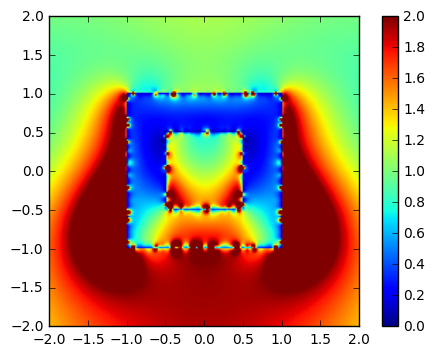

In [70]:
solb_1.plot()

In [71]:
solb_1.info

{'matvec_count': 11376,
 'status': 0,
 'time_assemble': 0.022122999999965032,
 'time_solve': 105.91194599999994}

In [30]:
model_wf.system.get_total_memory_size()

AttributeError: '_ReinterpretSpacesBoundaryOperator' object has no attribute 'memory'

3